<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/matplotlib(jun7_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

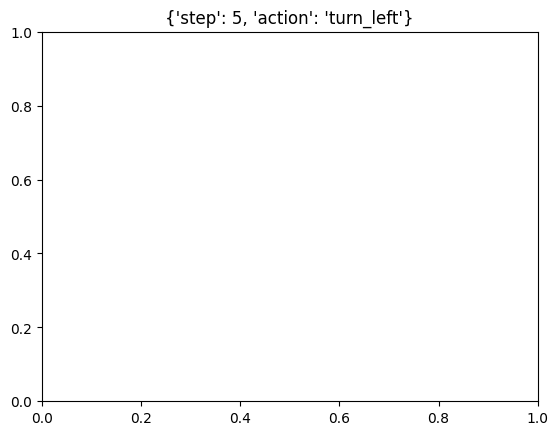

In [13]:
import matplotlib.pyplot as plt
def set_basic_plot(step_num = 1, action = 'forward'):
  figsize = (10, 8)
  x = (-1, 8)
  y = (-1, 12)
  fontsize = (10,8)
  plt.tight_layout()
  plot_info = {'step': step_num, 'action': action}
  title = f'{plot_info}'
  plt.title(title)
  plt.show()
if __name__ == '__main__':
  set_basic_plot(5, 'turn_left')


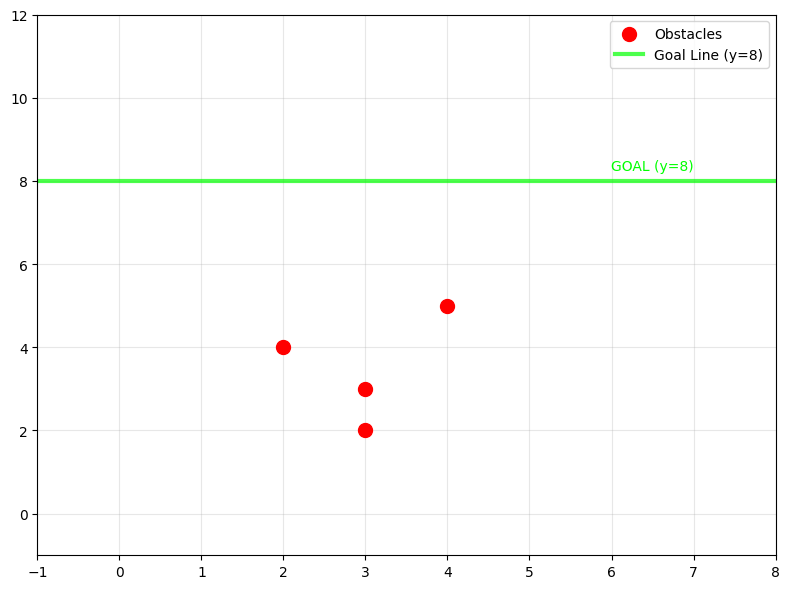

계산된 목표선 Y 좌표: 8


In [49]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
    fig, ax = plt.subplots(figsize=(8, 6))
    # 캔버스 설정
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    # 장애물 표시 (선택 사항: 시각화를 위해 추가)
    if obstacles:
        x_coords = [p[0] for p in obstacles]
        y_coords = [p[1] for p in obstacles]
        ax.scatter(x_coords, y_coords, color='red', s=100, zorder=5, label='Obstacles')
        # 가장 높은 장애물의 Y좌표 찾기
        max_y_obstacle = max(y_coords)
    else:
        max_y_obstacle = 0 # 장애물이 없으면 Y=0 기준

    # 목표선 계산
    goal_y = max_y_obstacle + 3
    # 목표선 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f'Goal Line (y={goal_y})')
    # 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', ha='right', va='bottom')
    # 범례 표시 및 레이아웃 최적화
    ax.legend()
    fig.tight_layout()

    # 화면 출력
    plt.show()

    return goal_y

# --- 실행 ---
# obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용
obstacles_set = {(3, 2), (3, 3), (2, 4), (4, 5)}
calculated_goal_y = draw_goal_line(obstacles_set)
print(f"계산된 목표선 Y 좌표: {calculated_goal_y}")


입력된 'obstacles'는 set 타입입니다. 리스트로 변환하여 사용합니다.

총 4개의 장애물을 그립니다.
  - 장애물 1: (2, 4) 위치에 그립니다.
  - 장애물 2: (3, 2) 위치에 그립니다.
  - 장애물 3: (3, 3) 위치에 그립니다.
  - 장애물 4: (4, 5) 위치에 그립니다.


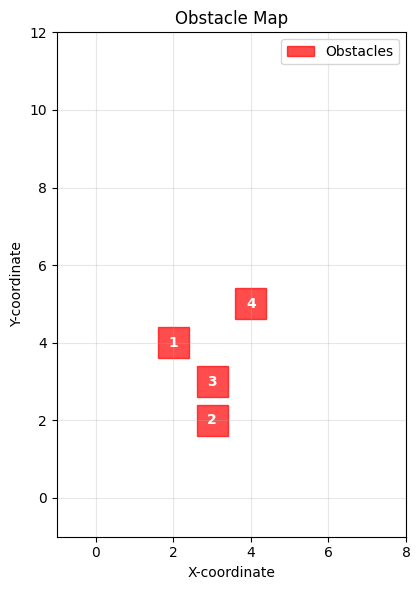

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    """
    장애물들을 사각형 형태로 그리고 각 장애물에 번호를 매겨 시각화합니다.

    매개변수:
        obstacles (set 또는 list): 각 장애물의 (x, y) 좌표를 담고 있는 집합 또는 리스트입니다.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # 캔버스 설정
    ax.set_xlim(-1, 8)  # X축 범위: -1 ~ 8
    ax.set_ylim(-1, 12) # Y축 범위: -1 ~ 12
    ax.set_aspect('equal') # 정사각형 비율
    ax.grid(True, alpha=0.3) # 격자 설정
    ax.set_xlabel('X-coordinate') # X축 라벨
    ax.set_ylabel('Y-coordinate') # Y축 라벨
    ax.set_title('Obstacle Map') # 그래프 제목

    # 데이터 처리: set을 list로 변환하여 순서 보장
    # isinstance() 함수로 타입 확인
    if isinstance(obstacles, set):
        obstacles_list = sorted(list(obstacles)) # set은 순서가 없으므로 정렬하여 리스트로 변환
        print("입력된 'obstacles'는 set 타입입니다. 리스트로 변환하여 사용합니다.")
    elif isinstance(obstacles, list):
        obstacles_list = obstacles
        print("입력된 'obstacles'는 list 타입입니다.")
    else:
        print("경고: 'obstacles'는 set 또는 list 타입이어야 합니다. 빈 리스트로 처리합니다.")
        obstacles_list = []

    print(f"\n총 {len(obstacles_list)}개의 장애물을 그립니다.")

    # 장애물 그리기 및 텍스트 표시
    for i, (x, y) in enumerate(obstacles_list):
        # 사각형 생성 (중심 좌표에서 0.4씩 빼서 위치 조정)
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8, color='red', alpha=0.7)
        ax.add_patch(rect)

        # 첫 번째 장애물에만 라벨 추가 (범례 표시용)
        if i == 0:
            rect.set_label('Obstacles')

        # 각 장애물 중앙에 번호 (흰색, 굵은 글씨)
        ax.text(x, y, str(i + 1), color='white',
                ha='center', va='center', fontweight='bold')
        print(f"  - 장애물 {i+1}: ({x}, {y}) 위치에 그립니다.")

    # 범례 표시 및 레이아웃 최적화
    ax.legend()
    fig.tight_layout()

    # 화면 출력
    plt.show()

# --- 실행 ---
obstacles_data = {(3, 2), (3, 3), (2, 4), (4, 5)}
draw_obstacles(obstacles_data)


--- 경로가 있는 경우 테스트 ---
총 5개의 경로 점이 연결된 경로선을 그렸습니다.
시작점: (1, 1)
끝점: (5, 2)
  - 점 1: (1, 1) 위치에 번호를 표시했습니다.
  - 점 2: (2, 3) 위치에 번호를 표시했습니다.
  - 점 3: (4, 5) 위치에 번호를 표시했습니다.
  - 점 4: (6, 4) 위치에 번호를 표시했습니다.
  - 점 5: (5, 2) 위치에 번호를 표시했습니다.


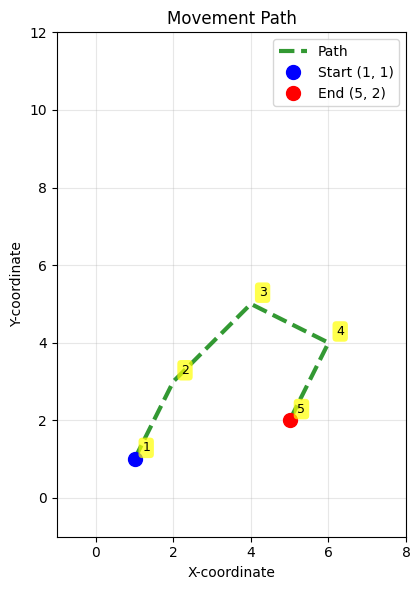

In [52]:
import matplotlib.pyplot as plt
def draw_path(path):
    """
    이동 경로를 시각화합니다. 경로선, 시작점, 끝점 및 각 경로 점의 번호를 표시합니다.

    매개변수:
        path (list): (x, y) 튜플 형태의 이동 경로 좌표들의 리스트입니다.
                     경로에 2개 이상의 점이 있어야 정상적으로 경로선이 그려집니다.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # 캔버스 설정
    ax.set_xlim(-1, 8)  # X축 범위: -1 ~ 8 (요청에 -18로 되어있었으나, 앞의 예시와 일관성을 위해 -1~8로 조정했습니다)
    ax.set_ylim(-1, 12) # Y축 범위: -1 ~ 12 (요청에 -112로 되어있었으나, 앞의 예시와 일관성을 위해 -1~12로 조정했습니다)
    ax.set_aspect('equal') # 정사각형 비율
    ax.grid(True, alpha=0.3) # 격자 설정
    ax.set_title("Movement Path") # 제목 설정
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')

    # 경로 그리기 (2개 이상 점)
    if len(path) >= 2:
        # 리스트 컴프리헨션으로 x, y 좌표 분리
        path_x = [p[0] for p in path]
        path_y = [p[1] for p in path]

        # 경로선: 초록색 점선 ('g--'), 선 두께: 3, 투명도: 0.8
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8, label='Path')
        print(f"총 {len(path)}개의 경로 점이 연결된 경로선을 그렸습니다.")
    elif len(path) == 1:
        print("경로에 하나의 점만 있어 경로선은 그려지지 않습니다. 시작점만 표시됩니다.")
    else:
        print("경로에 점이 없어 아무것도 그리지 않습니다.")
        plt.close(fig) # 빈 그래프 창이 뜨는 것을 방지
        return

    # 시작점과 끝점 표시
    if len(path) >= 1:
        # 시작점: 파란색 원 ('bo', markersize=10)
        start_point = path[0]
        ax.plot(start_point[0], start_point[1], 'bo', markersize=10,
                label=f'Start ({start_point[0]}, {start_point[1]})')
        print(f"시작점: ({start_point[0]}, {start_point[1]})")

        if len(path) >= 2:
            # 끝점: 빨간색 원 ('ro', markersize=10)
            end_point = path[-1]
            ax.plot(end_point[0], end_point[1], 'ro', markersize=10,
                    label=f'End ({end_point[0]}, {end_point[1]})')
            print(f"끝점: ({end_point[0]}, {end_point[1]})")

    # 점 번호 표시
    for i, (x, y) in enumerate(path):
        # 노란색 둥근 박스 배경
        ax.text(x + 0.2, y + 0.2, str(i + 1), color='black', fontsize=9,
                bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
        print(f"  - 점 {i+1}: ({x}, {y}) 위치에 번호를 표시했습니다.")

    # 범례 표시
    ax.legend()
    # 레이아웃 최적화
    fig.tight_layout()
    # 화면 출력
    plt.show()

# --- 실행 ---
# 이동 경로 좌표 리스트
movement_path = [(1, 1), (2, 3), (4, 5), (6, 4), (5, 2)]
print("--- 경로가 있는 경우 테스트 ---")
draw_path(movement_path)

--- 센서 빔 모두 표시 ---
차량 위치: (3, 5)
  - 전방 센서 빔: 4.5 (파란색)
  - 좌측 센서 빔: 3.0 (녹색)
  - 우측 센서 빔: 6.2 (빨간색)


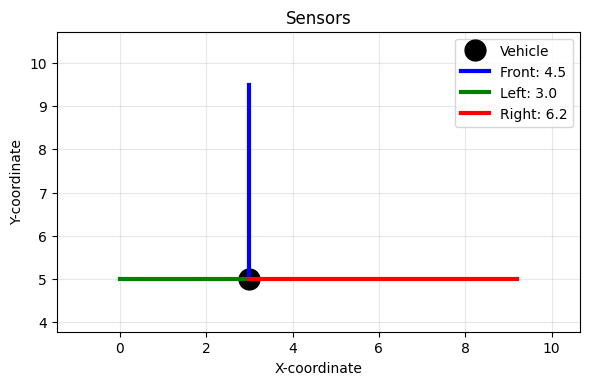

In [54]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    """
    주어진 차량 위치와 센서 값에 따라 센서 빔을 시각화합니다.

    매개변수:
        x (float): 차량의 X 좌표입니다.
        y (float): 차량의 Y 좌표입니다.
        sensors (dict): 'front', 'left', 'right' 키를 가지는 딕셔너리로,
                        각 방향의 센서 감지 거리(빔 길이)를 나타냅니다.
                        예: {'front': 5, 'left': 3, 'right': 4}
    """
    fig, ax = plt.subplots(figsize=(6, 5))

    # 캔버스 설정
    ax.grid(True, alpha=0.3)  # 격자
    ax.set_title("Sensors")   # 제목
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_aspect('equal', adjustable='box') # 정사각형 비율 유지

    # 차량 위치 표시: 검은색 원점 'ko', markersize=15
    ax.plot(x, y, 'ko', markersize=15, label='Vehicle')
    print(f"차량 위치: ({x}, {y})")

    # 센서 선 그리기
    linewidth = 3

    # 전방 센서 (Forward Sensor)
    if 'front' in sensors and sensors['front'] is not None:
        ax.plot([x, x], [y, y + sensors['front']], 'b-', linewidth=linewidth, label=f"Front: {sensors['front']:.1f}")
        print(f"  - 전방 센서 빔: {sensors['front']:.1f} (파란색)")
    else:
        print("  - 전방 센서 데이터가 없습니다.")

    # 좌측 센서 (Left Sensor)
    if 'left' in sensors and sensors['left'] is not None:
        ax.plot([x, x - sensors['left']], [y, y], 'g-', linewidth=linewidth, label=f"Left: {sensors['left']:.1f}")
        print(f"  - 좌측 센서 빔: {sensors['left']:.1f} (녹색)")
    else:
        print("  - 좌측 센서 데이터가 없습니다.")

    # 우측 센서 (Right Sensor)
    if 'right' in sensors and sensors['right'] is not None:
        ax.plot([x, x + sensors['right']], [y, y], 'r-', linewidth=linewidth, label=f"Right: {sensors['right']:.1f}")
        print(f"  - 우측 센서 빔: {sensors['right']:.1f} (빨간색)")
    else:
        print("  - 우측 센서 데이터가 없습니다.")

    # 축 범위 자동 조정 (센서 빔 길이에 맞춰)
    ax.autoscale_view()
    # 약간의 여백 추가
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    # 범례 표시
    ax.legend()

    # 레이아웃 최적화
    fig.tight_layout()

    # 화면 출력
    plt.show()

# --- 실행 예시 ---
print("--- 센서 빔 모두 표시 ---")
# 차량 위치와 센서 값 정의
vehicle_x = 3
vehicle_y = 5
sensor_data = {'front': 4.5, 'left': 3.0, 'right': 6.2}
draw_sensors(vehicle_x, vehicle_y, sensor_data)


--- 센서 빔 모두 표시 (최대 길이 초과 포함) ---
차량 위치: (3, 5)
  - 전방 센서 빔: 3.0 (제한됨: 4.5) (파란색)
  - 좌측 센서 빔: 3.0 (제한됨: 3.0) (녹색)
  - 우측 센서 빔: 3.0 (제한됨: 6.2) (빨간색)


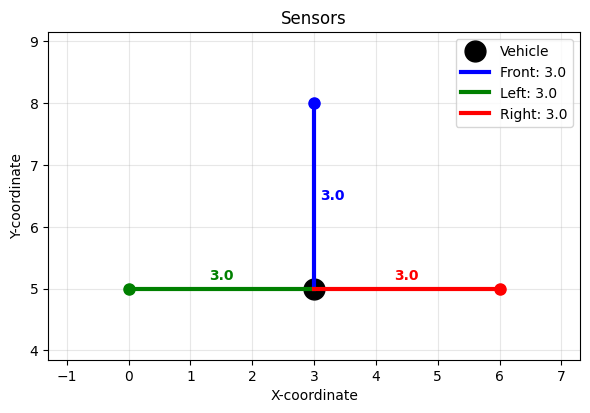


--- 일부 센서만 있는 경우 (최대 길이 미만) ---
차량 위치: (0, 0)
  - 전방 센서 빔: 2.0 (제한됨: 2.0) (파란색)
  - 좌측 센서 빔: 1.5 (제한됨: 1.5) (녹색)
  - 우측 센서 데이터가 없습니다.


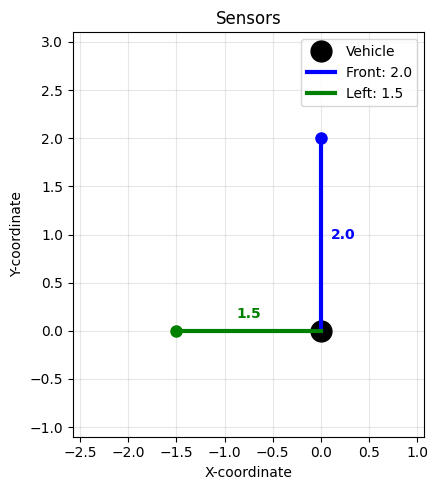


--- 센서 값 0인 경우 ---
차량 위치: (5, 5)
  - 전방 센서 빔: 0.0 (제한됨: 0.0) (파란색)
  - 좌측 센서 빔: 0.0 (제한됨: 0.0) (녹색)
  - 우측 센서 빔: 0.0 (제한됨: 0.0) (빨간색)


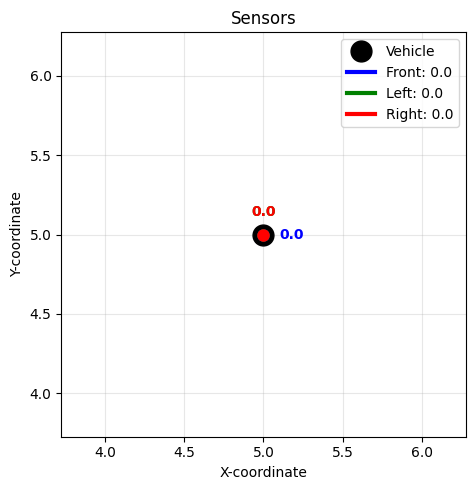

In [55]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    """
    주어진 차량 위치와 센서 값에 따라 센서 빔을 시각화합니다.
    센서 빔의 끝점과 길이를 텍스트로 표시하며, 최대 센서 길이를 제한합니다.

    매개변수:
        x (float): 차량의 X 좌표입니다.
        y (float): 차량의 Y 좌표입니다.
        sensors (dict): 'front', 'left', 'right' 키를 가지는 딕셔너리로,
                        각 방향의 센서 감지 거리(빔 길이)를 나타냅니다.
                        예: {'front': 5, 'left': 3, 'right': 4}
    """
    fig, ax = plt.subplots(figsize=(6, 5))

    # 캔버스 설정
    ax.grid(True, alpha=0.3)  # 격자
    ax.set_title("Sensors")   # 제목
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_aspect('equal', adjustable='box') # 정사각형 비율 유지

    # 차량 위치 표시: 검은색 원점 'ko', markersize=15
    ax.plot(x, y, 'ko', markersize=15, label='Vehicle')
    print(f"차량 위치: ({x}, {y})")

    # 센서 길이 제한 설정
    sensor_length_limit = 3 # 최대 센서 길이

    # 센서 선 그리기, 끝점 표시 및 거리 텍스트 표시
    linewidth = 3

    # 전방 센서 (Forward Sensor)
    if 'front' in sensors and sensors['front'] is not None:
        front_reach = min(sensors['front'], sensor_length_limit) # 최대 길이 제한 적용

        ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=linewidth, label=f"Front: {front_reach:.1f}")
        ax.plot(x, y + front_reach, 'bo', markersize=8) # 전방 끝점
        ax.text(x + 0.1, y + front_reach / 2, f'{front_reach:.1f}', color='blue', fontweight='bold', ha='left', va='center')
        print(f"  - 전방 센서 빔: {front_reach:.1f} (제한됨: {sensors['front']:.1f}) (파란색)")
    else:
        print("  - 전방 센서 데이터가 없습니다.")

    # 좌측 센서 (Left Sensor)
    if 'left' in sensors and sensors['left'] is not None:
        left_reach = min(sensors['left'], sensor_length_limit) # 최대 길이 제한 적용

        ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=linewidth, label=f"Left: {left_reach:.1f}")
        ax.plot(x - left_reach, y, 'go', markersize=8) # 좌측 끝점
        ax.text(x - left_reach / 2, y + 0.1, f'{left_reach:.1f}', color='green', fontweight='bold', ha='center', va='bottom')
        print(f"  - 좌측 센서 빔: {left_reach:.1f} (제한됨: {sensors['left']:.1f}) (녹색)")
    else:
        print("  - 좌측 센서 데이터가 없습니다.")

    # 우측 센서 (Right Sensor)
    if 'right' in sensors and sensors['right'] is not None:
        right_reach = min(sensors['right'], sensor_length_limit) # 최대 길이 제한 적용

        ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=linewidth, label=f"Right: {right_reach:.1f}")
        ax.plot(x + right_reach, y, 'ro', markersize=8) # 우측 끝점
        ax.text(x + right_reach / 2, y + 0.1, f'{right_reach:.1f}', color='red', fontweight='bold', ha='center', va='bottom')
        print(f"  - 우측 센서 빔: {right_reach:.1f} (제한됨: {sensors['right']:.1f}) (빨간색)")
    else:
        print("  - 우측 센서 데이터가 없습니다.")

    # 축 범위 자동 조정 (센서 빔 길이에 맞춰)
    ax.autoscale_view()
    # 약간의 여백 추가
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    # 범례 표시
    ax.legend()

    # 레이아웃 최적화
    fig.tight_layout()

    # 화면 출력
    plt.show()

# --- 실행 예시 ---
print("--- 센서 빔 모두 표시 (최대 길이 초과 포함) ---")
# 차량 위치와 센서 값 정의
vehicle_x = 3
vehicle_y = 5
sensor_data = {'front': 4.5, 'left': 3.0, 'right': 6.2} # front와 right는 3을 초과
draw_sensors(vehicle_x, vehicle_y, sensor_data)

print("\n--- 일부 센서만 있는 경우 (최대 길이 미만) ---")
sensor_data_partial = {'front': 2.0, 'left': 1.5} # right 센서 없음
draw_sensors(0, 0, sensor_data_partial)

print("\n--- 센서 값 0인 경우 ---")
sensor_data_zero = {'front': 0, 'left': 0, 'right': 0}
draw_sensors(5, 5, sensor_data_zero)

--- 모든 센서 빔 표시 ---
차량 위치: (3, 5)
  - 전방 센서 빔: 4.5 (파란색)
  - 좌측 센서 빔: 3.0 (녹색)
  - 우측 센서 빔: 6.2 (빨간색)


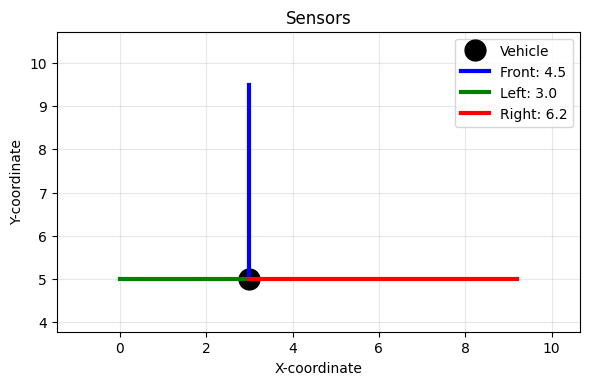


--- 일부 센서만 있는 경우 ---
차량 위치: (0, 0)
  - 전방 센서 빔: 7.0 (파란색)
  - 좌측 센서 빔: 2.5 (녹색)
  - 우측 센서 데이터가 없습니다.


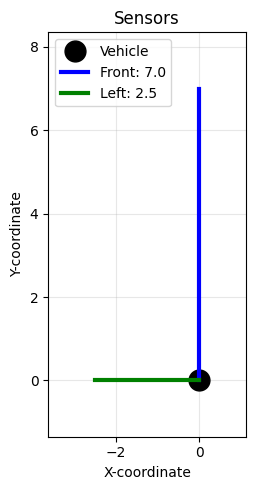


--- 센서 값 0인 경우 ---
차량 위치: (5, 5)
  - 전방 센서 빔: 0.0 (파란색)
  - 좌측 센서 빔: 0.0 (녹색)
  - 우측 센서 빔: 0.0 (빨간색)


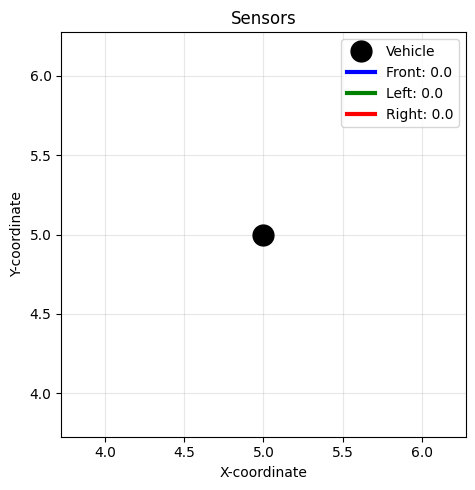

In [57]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    """
    주어진 차량 위치와 센서 값에 따라 센서 빔을 시각화합니다.

    매개변수:
        x (float): 차량의 X 좌표입니다.
        y (float): 차량의 Y 좌표입니다.
        sensors (dict): 'front', 'left', 'right' 키를 가지는 딕셔너리로,
                        각 방향의 센서 감지 거리(빔 길이)를 나타냅니다.
                        예: {'front': 5, 'left': 3, 'right': 4}
    """
    fig, ax = plt.subplots(figsize=(6, 5))

    # 캔버스 설정
    ax.grid(True, alpha=0.3)  # 격자
    ax.set_title("Sensors")   # 제목
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_aspect('equal', adjustable='box') # 정사각형 비율 유지

    # 차량 위치 표시: 검은색 원점 'ko', markersize=15
    ax.plot(x, y, 'ko', markersize=15, label='Vehicle')
    print(f"차량 위치: ({x}, {y})")

    # 센서 선 그리기
    line_width = 3

    # 전방 센서 (Forward Sensor)
    if 'front' in sensors and sensors['front'] is not None:
        ax.plot([x, x], [y, y + sensors['front']], 'b-', linewidth=line_width, label=f"Front: {sensors['front']:.1f}")
        print(f"  - 전방 센서 빔: {sensors['front']:.1f} (파란색)")
    else:
        print("  - 전방 센서 데이터가 없습니다.")

    # 좌측 센서 (Left Sensor)
    if 'left' in sensors and sensors['left'] is not None:
        ax.plot([x, x - sensors['left']], [y, y], 'g-', linewidth=line_width, label=f"Left: {sensors['left']:.1f}")
        print(f"  - 좌측 센서 빔: {sensors['left']:.1f} (녹색)")
    else:
        print("  - 좌측 센서 데이터가 없습니다.")

    # 우측 센서 (Right Sensor)
    if 'right' in sensors and sensors['right'] is not None:
        ax.plot([x, x + sensors['right']], [y, y], 'r-', linewidth=line_width, label=f"Right: {sensors['right']:.1f}")
        print(f"  - 우측 센서 빔: {sensors['right']:.1f} (빨간색)")
    else:
        print("  - 우측 센서 데이터가 없습니다.")

    # 축 범위 자동 조정 (센서 빔 길이에 맞춰)
    ax.autoscale_view()
    # 약간의 여백 추가
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    # 범례 표시
    ax.legend()

    # 레이아웃 최적화
    fig.tight_layout()

    # 화면 출력
    plt.show()

# --- 실행 예시 ---
print("--- 모든 센서 빔 표시 ---")
# 차량 위치와 센서 값 정의
vehicle_x = 3
vehicle_y = 5
sensor_data = {'front': 4.5, 'left': 3.0, 'right': 6.2}
draw_sensors(vehicle_x, vehicle_y, sensor_data)

print("\n--- 일부 센서만 있는 경우 ---")
sensor_data_partial = {'front': 7.0, 'left': 2.5} # 'right' 센서 없음
draw_sensors(0, 0, sensor_data_partial)

print("\n--- 센서 값 0인 경우 ---")
sensor_data_zero = {'front': 0, 'left': 0, 'right': 0}
draw_sensors(5, 5, sensor_data_zero)

--- 모든 센서 빔 표시 ---
차량 위치: (3, 5)
  - 전방 센서 빔: 4.5 (파란색)
  - 좌측 센서 빔: 3.0 (녹색)
  - 우측 센서 빔: 6.2 (빨간색)


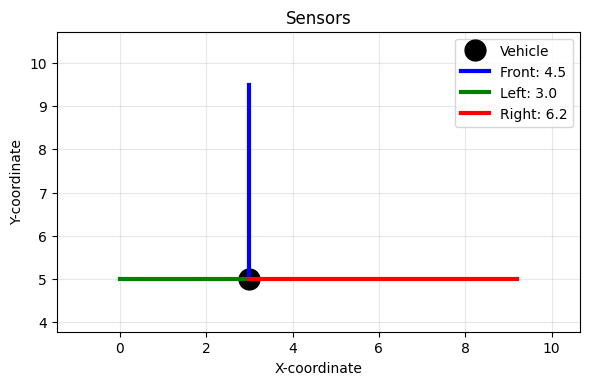


--- 일부 센서만 있는 경우 ---
차량 위치: (0, 0)
  - 전방 센서 빔: 7.0 (파란색)
  - 좌측 센서 빔: 2.5 (녹색)
  - 우측 센서 데이터가 없습니다.


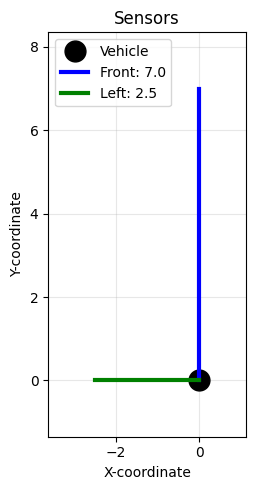


--- 센서 값 0인 경우 ---
차량 위치: (5, 5)
  - 전방 센서 빔: 0.0 (파란색)
  - 좌측 센서 빔: 0.0 (녹색)
  - 우측 센서 빔: 0.0 (빨간색)


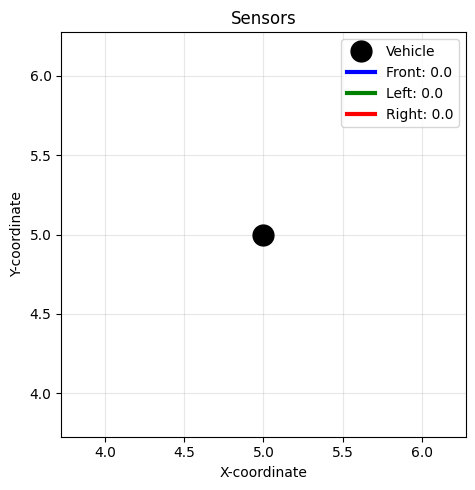

In [58]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    """
    주어진 차량 위치와 센서 값에 따라 센서 빔을 시각화합니다.

    매개변수:
        x (float): 차량의 X 좌표입니다.
        y (float): 차량의 Y 좌표입니다.
        sensors (dict): 'front', 'left', 'right' 키를 가지는 딕셔너리로,
                        각 방향의 센서 감지 거리(빔 길이)를 나타냅니다.
                        예: {'front': 5, 'left': 3, 'right': 4}
    """
    fig, ax = plt.subplots(figsize=(6, 5))

    # 캔버스 설정
    ax.grid(True, alpha=0.3)  # 격자
    ax.set_title("Sensors")   # 제목
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_aspect('equal', adjustable='box') # 정사각형 비율 유지

    # 차량 위치 표시: 검은색 원점 'ko', markersize=15
    ax.plot(x, y, 'ko', markersize=15, label='Vehicle')
    print(f"차량 위치: ({x}, {y})")

    # 센서 선 그리기
    line_width = 3

    # 전방 센서 (Forward Sensor)
    if 'front' in sensors and sensors['front'] is not None:
        ax.plot([x, x], [y, y + sensors['front']], 'b-', linewidth=line_width, label=f"Front: {sensors['front']:.1f}")
        print(f"  - 전방 센서 빔: {sensors['front']:.1f} (파란색)")
    else:
        print("  - 전방 센서 데이터가 없습니다.")

    # 좌측 센서 (Left Sensor)
    if 'left' in sensors and sensors['left'] is not None:
        ax.plot([x, x - sensors['left']], [y, y], 'g-', linewidth=line_width, label=f"Left: {sensors['left']:.1f}")
        print(f"  - 좌측 센서 빔: {sensors['left']:.1f} (녹색)")
    else:
        print("  - 좌측 센서 데이터가 없습니다.")

    # 우측 센서 (Right Sensor)
    if 'right' in sensors and sensors['right'] is not None:
        ax.plot([x, x + sensors['right']], [y, y], 'r-', linewidth=line_width, label=f"Right: {sensors['right']:.1f}")
        print(f"  - 우측 센서 빔: {sensors['right']:.1f} (빨간색)")
    else:
        print("  - 우측 센서 데이터가 없습니다.")

    # 축 범위 자동 조정 (센서 빔 길이에 맞춰)
    ax.autoscale_view()
    # 약간의 여백 추가
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    # 범례 표시
    ax.legend()

    # 레이아웃 최적화
    fig.tight_layout()

    # 화면 출력
    plt.show()

# --- 실행 예시 ---
print("--- 모든 센서 빔 표시 ---")
# 차량 위치와 센서 값 정의
vehicle_x = 3
vehicle_y = 5
sensor_data = {'front': 4.5, 'left': 3.0, 'right': 6.2}
draw_sensors(vehicle_x, vehicle_y, sensor_data)

print("\n--- 일부 센서만 있는 경우 ---")
sensor_data_partial = {'front': 7.0, 'left': 2.5} # 'right' 센서 없음
draw_sensors(0, 0, sensor_data_partial)

print("\n--- 센서 값 0인 경우 ---")
sensor_data_zero = {'front': 0, 'left': 0, 'right': 0}
draw_sensors(5, 5, sensor_data_zero)

In [12]:
import pandas as pd

# II‑30 데이터프레임 생성
data_II30 = {
    "구분": ["경기 전반 (체감)", "경기 전반 (전망)", "매출 (체감)", "매출 (전망)",
           "자금 사정 (체감)", "자금 사정 (전망)", "비용 상황 (체감)", "비용 상황 (전망)",
           "고객 수 (체감)", "고객 수 (전망)"],
    "2024.06": [63.9, 80.8, 62.1, 80.6, 66.5, 80.5, 105.8, 106.2, 65.0, 82.0],
    "2024.07": [57.3, 73.7, 56.1, 75.0, 62.7, 75.0, 111.4, 106.6, 58.0, 73.6],
    # ... 중략: 2024.08 ~ 2025.05 값 입력 ...
    "2025.06": [57.3, 67.4, 58.3, 69.0, 61.9, 68.7, 110.5, 105.4, 58.9, 69.5],
    "2025.07": [54.5, 57.9, 57.3, 58.8, 58.1, 62.4, 113.1, 116.7, 56.1, 59.2]
}
df_II30 = pd.DataFrame(data_II30).set_index("구분")

# II‑31 데이터프레임 생성
data_II31 = {
    "업종": ["제조업", "소매업", "음식점업", "부동산 중개업", "전문기술 서비스업",
           "교육 서비스업", "스포츠·오락업", "수리업", "개인 서비스업"],
    "2024.06 (체감)": [67.5, 62.5, 60.2, 60.3, 70.4, 76.2, 56.6, 65.8, 58.8],
    "2024.06 (전망)": [79.3, 80.5, 85.2, 75.9, 76.7, 92.3, 80.9, 79.9, 72.5],
    # ... 중략: 2024.07 ~ 2025.05 값 입력 ...
    "2025.06 (체감)": [58.4, 56.0, 51.0, 66.6, 56.8, 78.1, 54.0, 44.7, 45.7],
    "2025.06 (전망)": [67.7, 66.4, 56.3, 64.7, 60.7, 74.1, 62.5, 56.8, 47.5],
    "2025.07 (체감)": [54.3, 49.9, 51.8, 66.6, 56.8, 78.1, 54.0, 44.7, 45.7],
    "2025.07 (전망)": [52.3, 57.5, 56.3, 58.0, 61.7, 75.1, 62.5, 58.6, 47.5]
}
df_II31 = pd.DataFrame(data_II31).set_index("업종")

# 테이블 표시
print("II‑30 소상공인 부문별 실적 및 전망")
display(df_II30)
print("II‑31 소상공인 업종별 실적 및 전망")
display(df_II31)

II‑30 소상공인 부문별 실적 및 전망


,2024.06,2024.07,2025.06,2025.07
구분,,,,
경기 전반 (체감),63.9,57.3,57.3,54.5
경기 전반 (전망),80.8,73.7,67.4,57.9
매출 (체감),62.1,56.1,58.3,57.3
매출 (전망),80.6,75.0,69.0,58.8
자금 사정 (체감),66.5,62.7,61.9,58.1
자금 사정 (전망),80.5,75.0,68.7,62.4
비용 상황 (체감),105.8,111.4,110.5,113.1
비용 상황 (전망),106.2,106.6,105.4,116.7
고객 수 (체감),65.0,58.0,58.9,56.1


II‑31 소상공인 업종별 실적 및 전망


,2024.06 (체감),2024.06 (전망),2025.06 (체감),2025.06 (전망),2025.07 (체감),2025.07 (전망)
업종,,,,,,
제조업,67.5,79.3,58.4,67.7,54.3,52.3
소매업,62.5,80.5,56.0,66.4,49.9,57.5
음식점업,60.2,85.2,51.0,56.3,51.8,56.3
부동산 중개업,60.3,75.9,66.6,64.7,66.6,58.0
전문기술 서비스업,70.4,76.7,56.8,60.7,56.8,61.7
교육 서비스업,76.2,92.3,78.1,74.1,78.1,75.1
스포츠·오락업,56.6,80.9,54.0,62.5,54.0,62.5
수리업,65.8,79.9,44.7,56.8,44.7,58.6
개인 서비스업,58.8,72.5,45.7,47.5,45.7,47.5
